# <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Twitter Sentiment Analysis 🕊️</div>

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> About Dataset</h3>
</div>


* The dataset consists of message, entity, and sentiment in Twitter. There are three classes in the dataset: positive, negative, and neutral. The messages that are not relevant to the entity should be regarded as neutral.

    * Tweet ID: ID of Tweet
    * Entity: Entity that Tweet talks about
    * Sentiment: Sentiment of the tweet text regarding the entity
      Positive, Negative, Neutral, Irrelevant
    * Tweet Content: Tweet Text


<div id='2.1' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Import Libraries </h3>
</div>
 

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
train=pd.read_csv('twitter_training.csv',names=col_names)
train

ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [3]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
validation=pd.read_csv('twitter_validation.csv',names=col_names)
validation

ID               Entity   Sentiment  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                               Content  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

In [4]:
data=train.append(validation)

In [5]:
data

ID               Entity   Sentiment  \
0    2401          Borderlands    Positive   
1    2401          Borderlands    Positive   
2    2401          Borderlands    Positive   
3    2401          Borderlands    Positive   
4    2401          Borderlands    Positive   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                               Content  
0    im getting on borderlands and i will murder yo...  
1    I am coming to the borders and I will kill you...  
2    im getting on borderlands and i will kill you ...  
3    im coming on borderlands and i will murder you...  
4    im getting on borderlands 2 and i will murder ...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[75682 rows x 4 columns]

<div id='2.3' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Exploratory Data Analysis </h3>
</div>


In [6]:
data.shape

(75682, 4)

In [7]:
data.describe(include='all').T

count unique                   top   freq         mean  \
ID         75682.0    NaN                   NaN    NaN  6432.579583   
Entity       75682     32  TomClancysRainbowSix   2435          NaN   
Sentiment    75682      4              Negative  22808          NaN   
Content      74996  69974                          172          NaN   

                   std  min     25%     50%     75%      max  
ID         3740.243463  1.0  3196.0  6423.0  9602.0  13200.0  
Entity             NaN  NaN     NaN     NaN     NaN      NaN  
Sentiment          NaN  NaN     NaN     NaN     NaN      NaN  
Content            NaN  NaN     NaN     NaN     NaN      NaN

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         75682 non-null  int64 
 1   Entity     75682 non-null  object
 2   Sentiment  75682 non-null  object
 3   Content    74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

<Axes: >

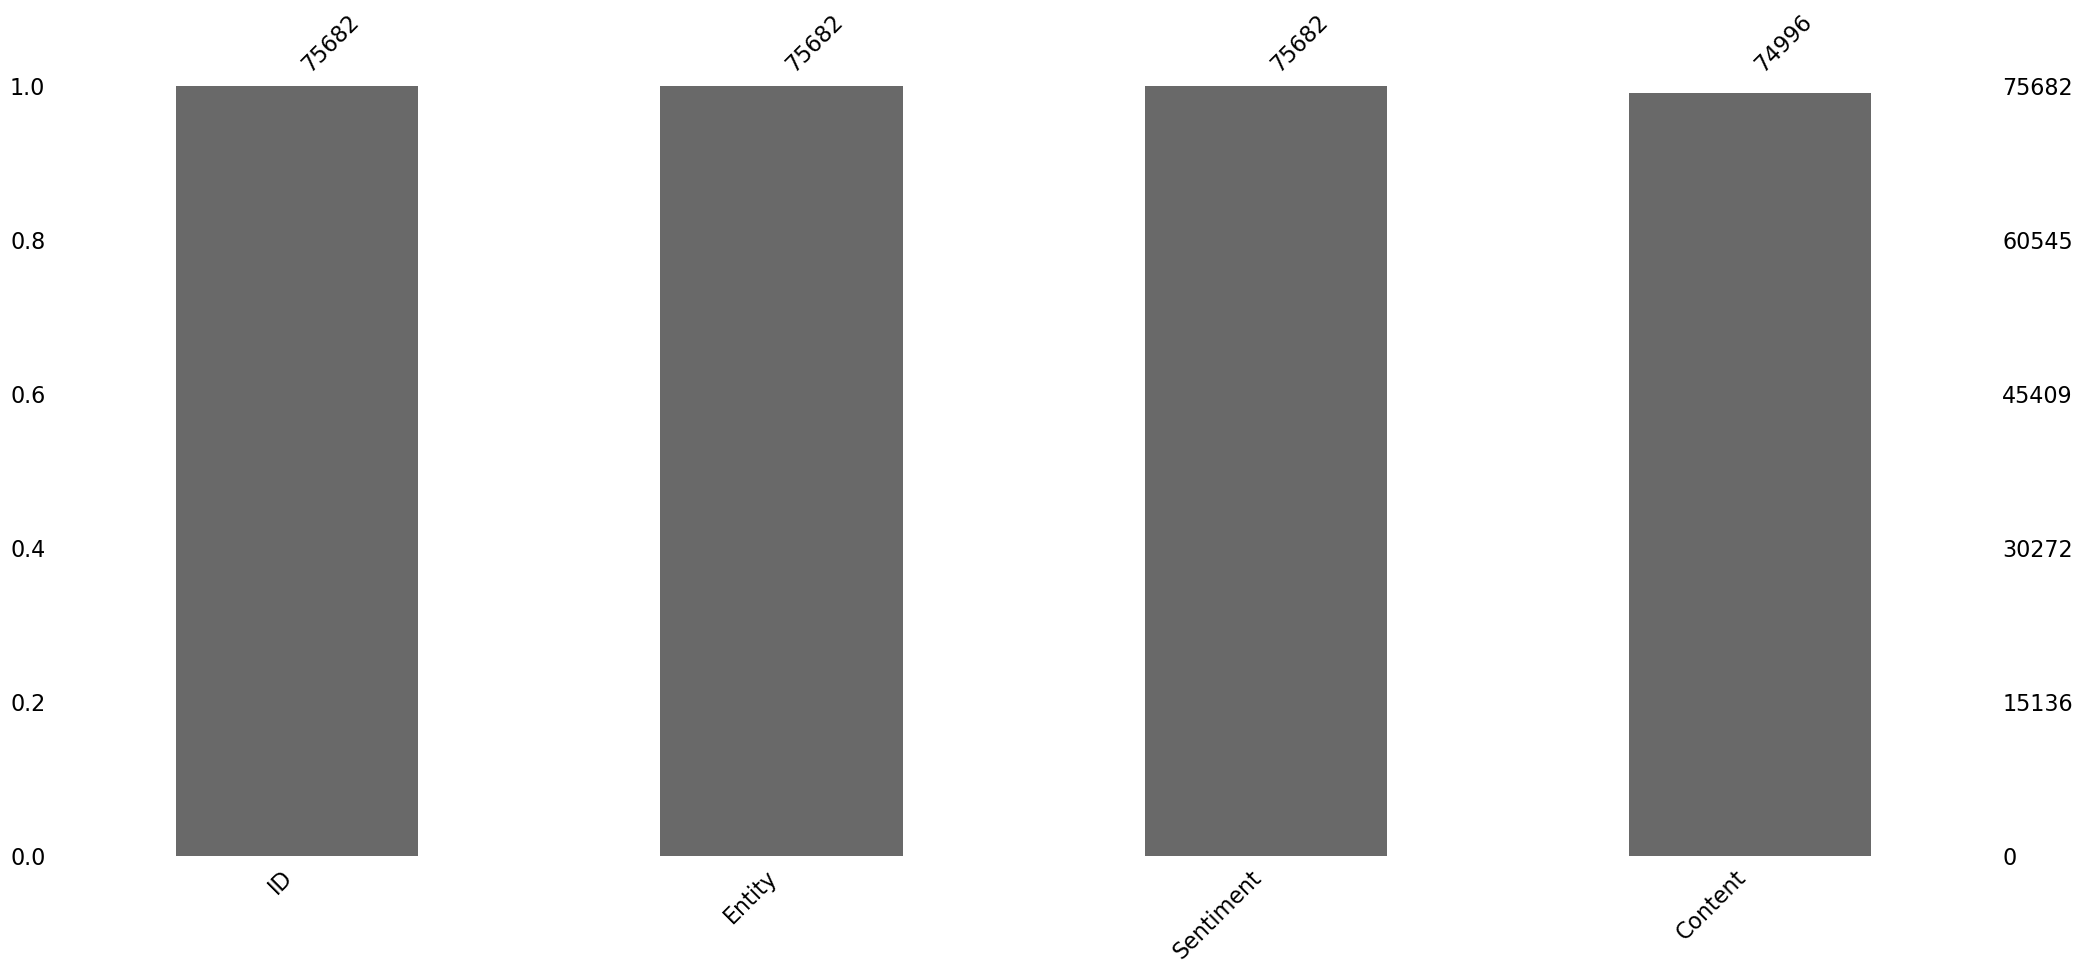

In [10]:
msno.bar(data)

* There is 686 null values in Content

In [11]:
data.dropna(subset=['Content'], inplace=True)

In [12]:
data

ID               Entity   Sentiment  \
0    2401          Borderlands    Positive   
1    2401          Borderlands    Positive   
2    2401          Borderlands    Positive   
3    2401          Borderlands    Positive   
4    2401          Borderlands    Positive   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                               Content  
0    im getting on borderlands and i will murder yo...  
1    I am coming to the borders and I will kill you...  
2    im getting on borderlands and i will kill you ...  
3    im coming on borderlands and i will murder you...  
4    im getting on borderlands 2 and i will murder ...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[74996 rows x 4 columns]

In [13]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [14]:
data.columns

Index(['ID', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [15]:
data['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [16]:
data['Entity'].nunique()

32

In [17]:
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [18]:
train['Sentiment'] = train['Sentiment'].replace('Irrelevant', 'Neutral')
validation['Sentiment'] = validation['Sentiment'].replace('Irrelevant', 'Neutral')
data['Sentiment'] = data['Sentiment'].replace('Irrelevant', 'Neutral')

In [19]:
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

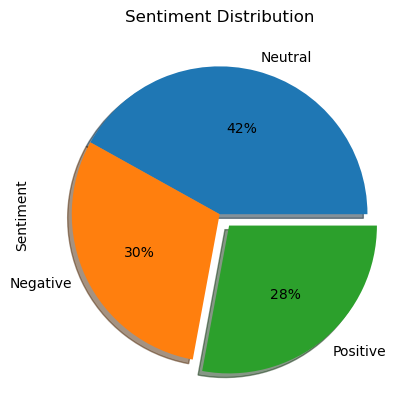

In [20]:
plt.title('Sentiment Distribution')
data['Sentiment'].value_counts().plot(kind='pie',explode=(0,0,0.1),shadow=True,autopct="%.0f%%")
plt.show()

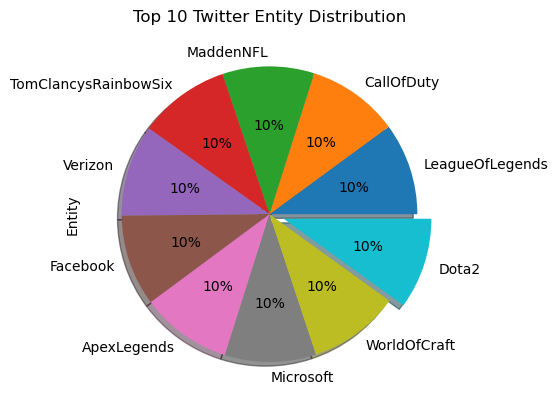

In [21]:
plt.title('Top 10 Twitter Entity Distribution')
data['Entity'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',explode=(0,0,0,0,0,0,0,0,0,0.1),shadow=True,autopct="%.0f%%")
plt.show()

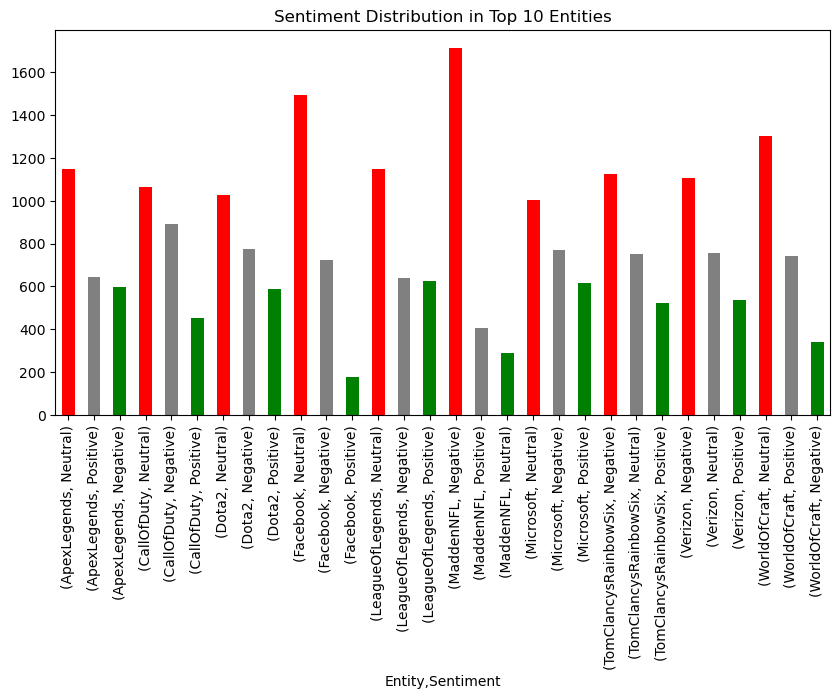

In [22]:
plt.figure(figsize=(10,5))
plt.title('Sentiment Distribution in Top 10 Entities')
top10_entity_data = data['Entity'].value_counts().sort_values(ascending=False)[:10]
top10_entity = top10_entity_data.index.tolist()
data.loc[data['Entity'].isin(top10_entity)].groupby('Entity')['Sentiment'].value_counts().plot(kind='bar',color=['red', 'grey', 'green'])
plt.show()

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> Text Analysis with NLP Preprocessing </h3>
</div>

In [23]:
import nltk
import string
stemmer = nltk.SnowballStemmer("english")
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()


In [24]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [25]:
from nltk.corpus import stopwords 
stopwords=set(stopwords.words('english'))

In [26]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
# import demoji

In [28]:
def clean(text):
    text=str(text).lower()
     # Remove text within square brackets
    text=re.sub('\[.*?\]','',text)
    # Remove URLs
    text=re.sub('https?://\S+|www\.\S+','',text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    #  Removing Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace newline characters with spaces
    text = re.sub('\n', '', text)
    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)
     # Tokenize the text and remove stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    # Stem the remaining words
    text = [stemmer.stem(word) for word in text.split(' ')]
    # Join the cleaned and stemmed words back into a string
    text=" ".join(text)
    return text
data['Content'] = data['Content'].apply(clean)

In [29]:
data['Content']

0                              im get borderland murder 
1                                       come border kill
2                                 im get borderland kill
3                              im come borderland murder
4                              im get borderland  murder
                             ...                        
995     toronto art cultur capit canada wonder want s...
996    actual good move tot bring viewersi one peopl ...
997    today suck time drink wine n play borderland s...
998            bought fraction microsoft today small win
999    johnson  johnson stop sell talc babi powder us...
Name: Content, Length: 74996, dtype: object

In [30]:
text=data['Content'].values
text

array(['im get borderland murder ', 'come border kill',
       'im get borderland kill', ...,
       'today suck time drink wine n play borderland sun come hate day tomorrow',
       'bought fraction microsoft today small win',
       'johnson  johnson stop sell talc babi powder us canada  reuter '],
      dtype=object)

In [31]:
# Step 1: Tokenization
tokens = []
for sentence in text:
    tokens.extend(sentence.split())

In [32]:
# Step 2: Frequency Count
word_count = {}
for token in tokens:
    if token in word_count:
        word_count[token] += 1
    else:
        word_count[token] = 1

In [33]:
word_count

{'im': 5031,
 'get': 5742,
 'borderland': 1595,
 'murder': 116,
 'come': 1827,
 'border': 64,
 'kill': 1130,
 'spent': 191,
 'hour': 861,
 'make': 2981,
 'someth': 968,
 'fun': 1592,
 'dont': 2714,
 'know': 2044,
 'huge': 431,
 'fan': 624,
 'maya': 30,
 'one': 3768,
 'favorit': 654,
 'charact': 574,
 'decid': 285,
 'wallpap': 15,
 'pc': 782,
 'origin': 366,
 'imag': 113,
 'versus': 18,
 'creation': 7,
 'made': 1068,
 'enjoy': 907,
 'coupl': 165,
 'here': 199,
 'pictur': 182,
 'compar': 123,
 'pictwittercom': 871,
 'rhandlerr': 2004,
 'rockhard': 4,
 'la': 70,
 'varlop': 4,
 'rare': 68,
 'power': 548,
 'handsom': 74,
 'jackpot': 7,
 'xbox': 2169,
 'dlvritrmtrgf': 3,
 'dlvrit': 64,
 'rmtrgf': 3,
 'dfrit': 7,
 'vita': 12,
 'live': 1553,
 'rock': 131,
 'hard': 617,
 'music': 407,
 'sega': 27,
 'dlvr': 66,
 'e': 333,
 'ihard': 1,
 'like': 5292,
 'london': 25,
 'de': 106,
 'first': 1760,
 'session': 96,
 'long': 683,
 'time': 3595,
 'actual': 1282,
 'realli': 3300,
 'satisfi': 108,
 'combat'

In [34]:
# Step 3: Vocabulary Size
vocab_size = len(word_count)
print("Vocabulary size:", vocab_size)

Vocabulary size: 25162


In [35]:
corpus=''.join(i for i in data['Content'])

In [36]:
corpus

'im get borderland murder come border killim get borderland killim come borderland murderim get borderland  murderim get borderland murderspent hour make someth fun   dont know huge borderland fan maya one favorit charact decid make wallpap pc  origin imag versus creation made  enjoy spent coupl hour someth fun dont know im huge  borderland fan maya one favorit charact decid make wallpap pc here origin pictur compar creation made fun pictwittercom  spent hour someth fun dont know im huge  borderland fan maya one favorit charactspent hour make someth fun   dont know huge rhandlerr fan maya one favorit charact decid make wallpap pc  origin imag versus creation made  enjoy  spent hour make someth fun   dont know huge rhandlerr fan maya one favorit charact decid make wallpap pc  origin imag versus creation made  enjoy rockhard la varlop rare  power handsom jackpot borderland  xbox dlvritrmtrgf  rockhard la varlop rare  power handsom jackpot borderland  xbox dlvrit  rmtrgfrockhard la varlop

In [37]:
data_cleaned=pd.DataFrame()
data_cleaned['Content']=data["Content"].apply(clean)
data_cleaned['Sentiment']=data['Sentiment']
data_cleaned

Content Sentiment
0                            im get borderland murder   Positive
1                                     come border kill  Positive
2                               im get borderland kill  Positive
3                            im come borderland murder  Positive
4                            im get borderland  murder  Positive
..                                                 ...       ...
995   toronto art cultur capit canada wonder want s...   Neutral
996  actual good move tot bring viewersi one peopl ...   Neutral
997  today suck time drink wine n play borderland s...  Positive
998          bought fraction microsoft today small win  Positive
999  johnson  johnson stop sell talc babi powder us...   Neutral

[74996 rows x 2 columns]

In [38]:
data['Sentiment'].values

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Neutral'], dtype=object)

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'> WordCloud </h3>
</div>


In [39]:
#This df is created for wordcloud only
data_eda = pd.DataFrame()
data_eda['Content'] = data['Content'].values
data_eda['Sentiment'] = data['Sentiment'].values
data_eda.head()

Content Sentiment
0  im get borderland murder   Positive
1           come border kill  Positive
2     im get borderland kill  Positive
3  im come borderland murder  Positive
4  im get borderland  murder  Positive

In [40]:
positive = data_eda[data_eda['Sentiment'] == 'Positive']
positive_list = positive['Content'].tolist()
negative = data_eda[data_eda['Sentiment'] == 'Negative']
negative_list = negative['Content'].tolist()
Neutral = data_eda[data_eda['Sentiment'] == 'Neutral']
Neutral_list = negative['Content'].tolist()

In [41]:
'Neutral', 'Negative'

('Neutral', 'Negative')

In [42]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])
neutral_all = " ".join([word for sent in Neutral_list for word in sent ])


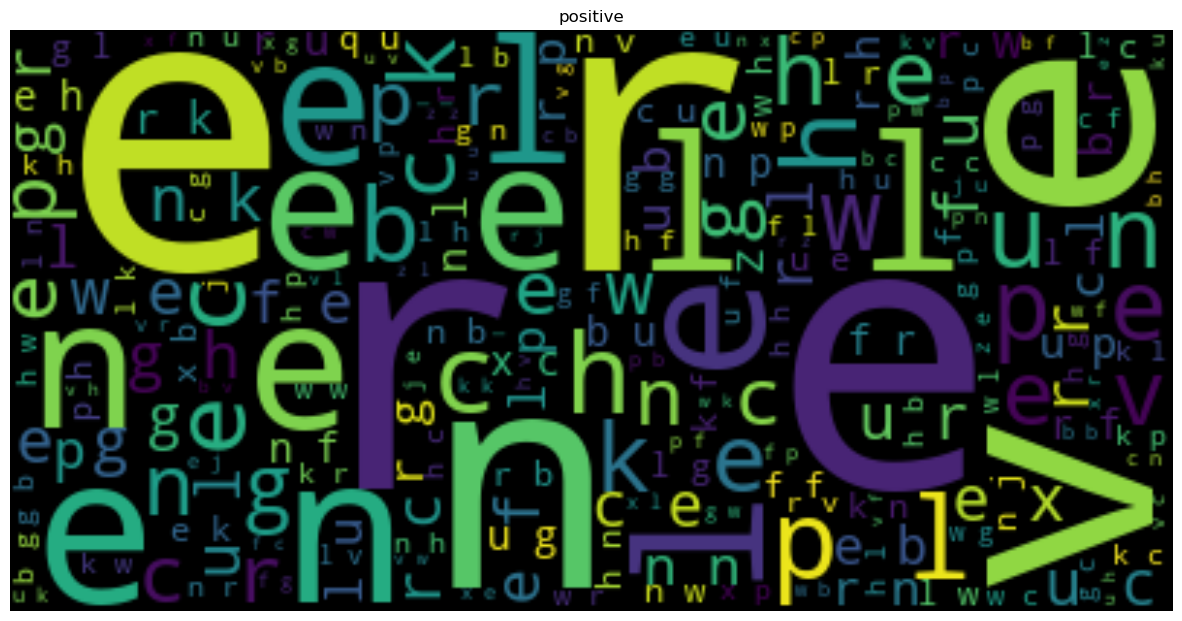

In [43]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive_all)
plt.figure( figsize=(15,10))
plt.title("positive")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

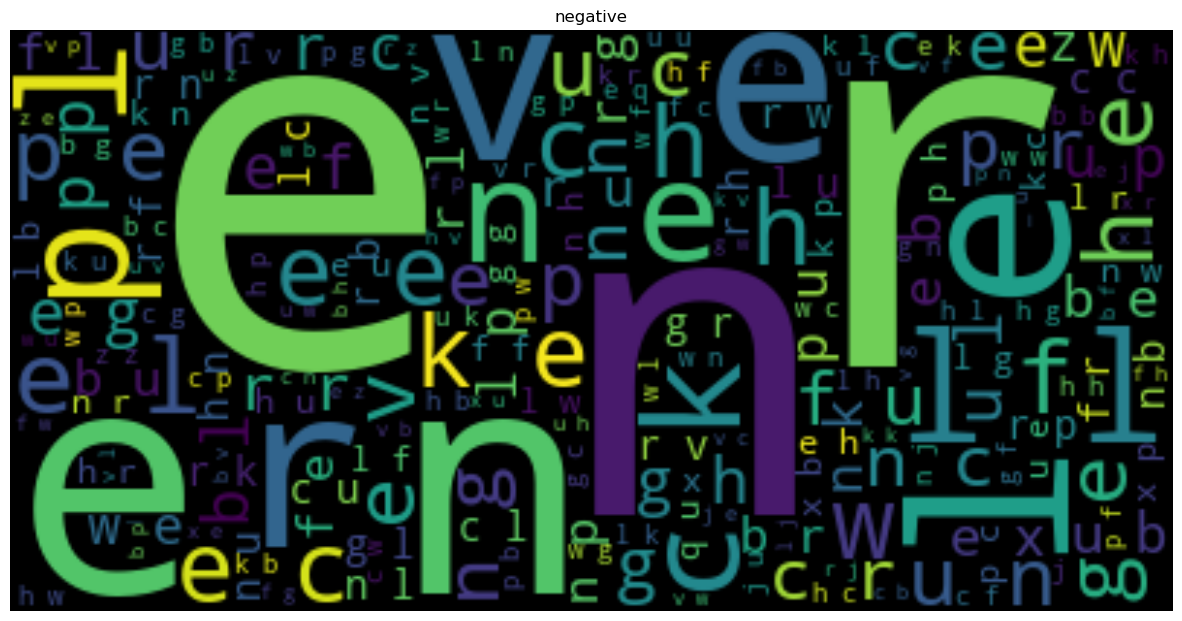

In [44]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative_all)
plt.figure( figsize=(15,10))
plt.title("negative")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

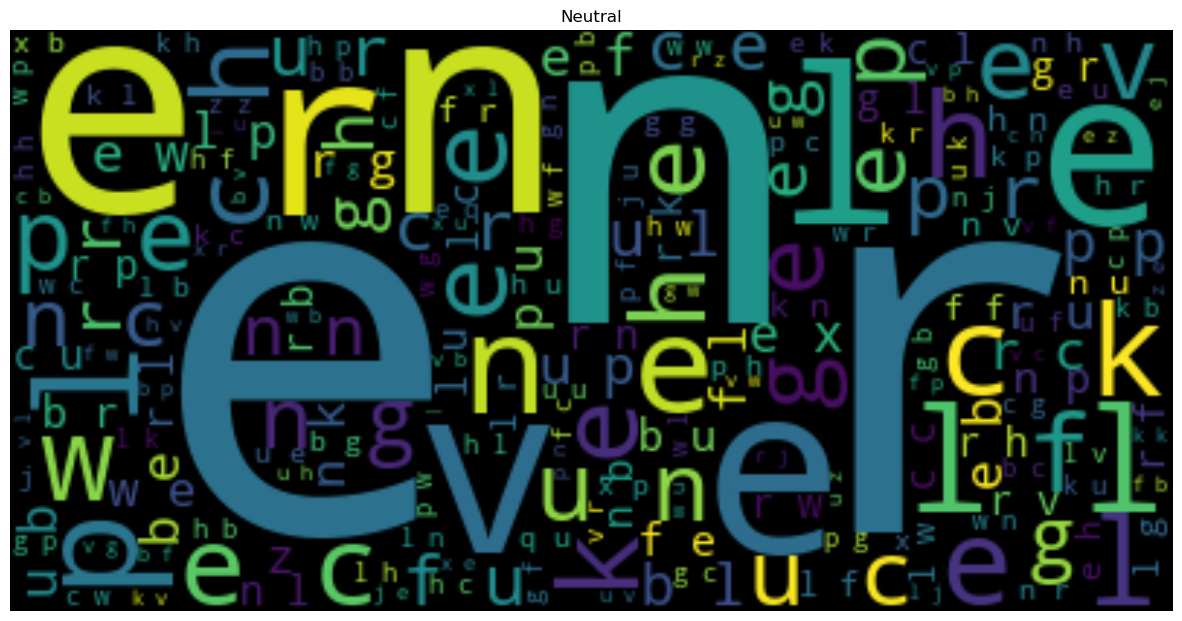

In [45]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(neutral_all)
plt.figure( figsize=(15,10))
plt.title("Neutral")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

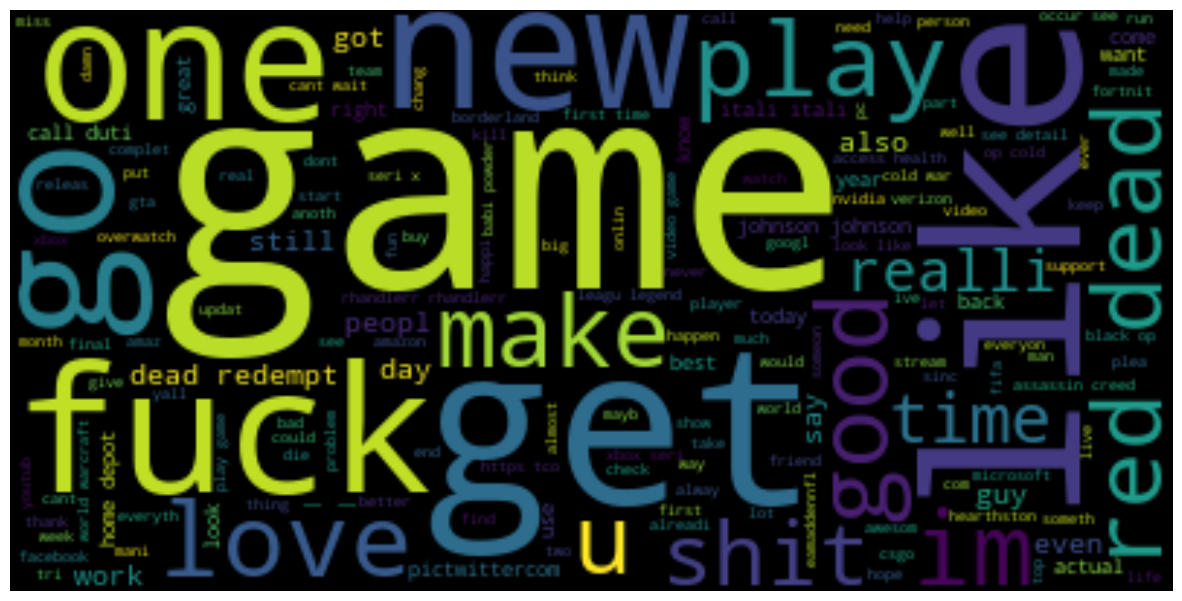

In [46]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(corpus)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'>Sentiment Intensity Analyse</h3>
</div>


In [47]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [49]:
train_clean=pd.DataFrame()
train_clean["Content"]=data["Content"]
train_clean["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Content"]]
train_clean["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Content"]]
train_clean["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Content"]]


In [50]:
train_clean.head()

Content  Positive  Negative  Neutral
0  im get borderland murder        0.0     0.610    0.390
1           come border kill       0.0     0.701    0.299
2     im get borderland kill       0.0     0.610    0.390
3  im come borderland murder       0.0     0.610    0.390
4  im get borderland  murder       0.0     0.610    0.390

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'>1.0  Model Building</h3>
</div>


In [51]:
data_cleaned

Content Sentiment
0                            im get borderland murder   Positive
1                                     come border kill  Positive
2                               im get borderland kill  Positive
3                            im come borderland murder  Positive
4                            im get borderland  murder  Positive
..                                                 ...       ...
995   toronto art cultur capit canada wonder want s...   Neutral
996  actual good move tot bring viewersi one peopl ...   Neutral
997  today suck time drink wine n play borderland s...  Positive
998          bought fraction microsoft today small win  Positive
999  johnson  johnson stop sell talc babi powder us...   Neutral

[74996 rows x 2 columns]

In [52]:
X = data_cleaned['Content']
y = data_cleaned['Sentiment']

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
#Showing Model Summary
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.75      0.77      4464
     Neutral       0.76      0.83      0.80      6372
    Positive       0.78      0.72      0.75      4164

    accuracy                           0.78     15000
   macro avg       0.78      0.77      0.77     15000
weighted avg       0.78      0.78      0.78     15000



In [58]:
score=accuracy_score(y_test, y_pred)
score

0.7763333333333333

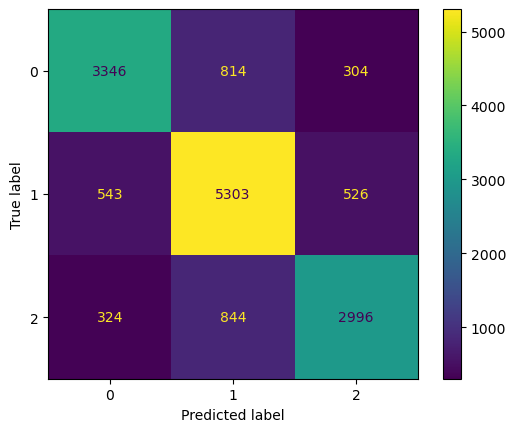

In [59]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

<div id='2.2' style='background-color:#80ced6;text-align:center;padding:4px;border-radius:25px'>
    <h3 style='color:black;font-family:Impact'>1.1  Model Building</h3>
</div>


In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [61]:
text=data_cleaned['Content'].values
text

array(['im get borderland murder ', 'come border kill',
       'im get borderland kill', ...,
       'today suck time drink wine n play borderland sun come hate day tomorrow',
       'bought fraction microsoft today small win',
       'johnson  johnson stop sell talc babi powder us canada  reuter '],
      dtype=object)

In [62]:
# Step 1: Tokenization
tokens = []
for sentence in text:
    tokens.extend(sentence.split())


In [63]:
# Step 2: Frequency Count
word_count = {}
for token in tokens:
    if token in word_count:
        word_count[token] += 1
    else:
        word_count[token] = 1


In [64]:
# Step 3: Vocabulary Size
vocab_size = len(word_count)


In [65]:
print("Vocabulary size:", vocab_size)

Vocabulary size: 25009


In [66]:
# Tokenization: converting words or subwords into numerical tokens
max_features=vocab_size
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(text)
# tokenizes the input text data into sequences of integer indices
sequences = tokenizer.texts_to_sequences(text)


* **num_words** specifies the maximum number of words to keep based on word frequency. The most common 2000 words will be retained, and less common words will be discarded.

In [67]:
sequences

[[5, 3, 67, 1142],
 [53, 1755, 115],
 [5, 3, 67, 115],
 [5, 53, 67, 1142],
 [5, 3, 67, 1142],
 [5, 3, 67, 1142],
 [747,
  159,
  16,
  137,
  68,
  22,
  39,
  337,
  67,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  1169,
  3820,
  6414,
  121,
  148],
 [747,
  869,
  159,
  137,
  68,
  22,
  39,
  5,
  337,
  67,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  779,
  1095,
  6414,
  121,
  68,
  156],
 [747, 159, 137, 68, 22, 39, 5, 337, 67, 224, 2800, 9, 215, 250],
 [747,
  159,
  16,
  137,
  68,
  22,
  39,
  337,
  41,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  1169,
  3820,
  6414,
  121,
  148],
 [747,
  159,
  16,
  137,
  68,
  22,
  39,
  337,
  41,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  1169,
  3820,
  6414,
  121,
  148],
 [],
 [11398, 1603, 11399, 1674, 265, 1589, 5411, 67, 32, 13158],
 [11398, 1603, 11399, 1674, 265, 1589, 5411, 67, 32, 1756, 13159],
 [11398, 1603

In [68]:
x=tokenizer.texts_to_sequences(text)

In [69]:
x= pad_sequences(x)

In [70]:
x

array([[   0,    0,    0, ...,    3,   67, 1142],
       [   0,    0,    0, ...,   53, 1755,  115],
       [   0,    0,    0, ...,    3,   67,  115],
       ...,
       [   0,    0,    0, ...,  132,   30,  395],
       [   0,    0,    0, ...,   61,  589,   96],
       [   0,    0,    0, ...,   46,  716, 3242]])

In [71]:
x.shape

(74996, 163)

In [72]:
x.shape[1]

163

In [73]:
model=Sequential([
   tf.keras.layers.Embedding(vocab_size,output_dim=100,input_length=x.shape[1]),
   tf.keras.layers.LSTM(100),
   tf.keras.layers.Dense(3,activation='softmax')
    ])

In [74]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [75]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 163, 100)          2500900   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 2581603 (9.85 MB)
Trainable params: 2581603 (9.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [76]:
y=pd.get_dummies(data_cleaned['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)


In [77]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(50247, 163) (50247, 3)
(24749, 163) (24749, 3)


In [78]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.0001,
                patience=20,
                verbose=1,
                mode='auto',
                baseline=None,
                restore_best_weights=False,
                )


In [80]:
model.fit(X_train, Y_train,epochs = 15,batch_size=150,verbose = 2)

Epoch 1/15
335/335 - 243s - loss: 0.4673 - accuracy: 0.8124 - 243s/epoch - 726ms/step
Epoch 2/15
335/335 - 227s - loss: 0.3362 - accuracy: 0.8658 - 227s/epoch - 677ms/step
Epoch 3/15
335/335 - 220s - loss: 0.2745 - accuracy: 0.8909 - 220s/epoch - 655ms/step
Epoch 4/15
335/335 - 251s - loss: 0.2334 - accuracy: 0.9066 - 251s/epoch - 751ms/step
Epoch 5/15
335/335 - 247s - loss: 0.2061 - accuracy: 0.9177 - 247s/epoch - 737ms/step
Epoch 6/15
335/335 - 236s - loss: 0.1872 - accuracy: 0.9244 - 236s/epoch - 705ms/step
Epoch 7/15
335/335 - 248s - loss: 0.1713 - accuracy: 0.9325 - 248s/epoch - 741ms/step
Epoch 8/15
335/335 - 239s - loss: 0.1604 - accuracy: 0.9346 - 239s/epoch - 714ms/step
Epoch 9/15
335/335 - 247s - loss: 0.1513 - accuracy: 0.9393 - 247s/epoch - 738ms/step
Epoch 10/15
335/335 - 248s - loss: 0.1457 - accuracy: 0.9409 - 248s/epoch - 740ms/step
Epoch 11/15
335/335 - 233s - loss: 0.1329 - accuracy: 0.9457 - 233s/epoch - 697ms/step
Epoch 12/15
335/335 - 273s - loss: 0.1263 - accuracy

In [81]:
model.fit(X_test,Y_test,epochs = 15,batch_size=150,verbose = 2)

Epoch 1/15
165/165 - 118s - loss: 0.4037 - accuracy: 0.8581 - 118s/epoch - 717ms/step
Epoch 2/15
165/165 - 106s - loss: 0.2095 - accuracy: 0.9230 - 106s/epoch - 639ms/step
Epoch 3/15
165/165 - 107s - loss: 0.1525 - accuracy: 0.9418 - 107s/epoch - 649ms/step
Epoch 4/15
165/165 - 119s - loss: 0.1211 - accuracy: 0.9525 - 119s/epoch - 724ms/step
Epoch 5/15
165/165 - 117s - loss: 0.1025 - accuracy: 0.9585 - 117s/epoch - 710ms/step
Epoch 6/15
165/165 - 98s - loss: 0.0942 - accuracy: 0.9621 - 98s/epoch - 595ms/step
Epoch 7/15
165/165 - 97s - loss: 0.0870 - accuracy: 0.9644 - 97s/epoch - 587ms/step
Epoch 8/15
165/165 - 96s - loss: 0.0829 - accuracy: 0.9657 - 96s/epoch - 582ms/step
Epoch 9/15
165/165 - 104s - loss: 0.0750 - accuracy: 0.9680 - 104s/epoch - 630ms/step
Epoch 10/15
165/165 - 102s - loss: 0.0734 - accuracy: 0.9695 - 102s/epoch - 620ms/step
Epoch 11/15
165/165 - 101s - loss: 0.0701 - accuracy: 0.9696 - 101s/epoch - 614ms/step
Epoch 12/15
165/165 - 101s - loss: 0.0692 - accuracy: 0.97